### 1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Realiza un análisis con regresión linear teniendo como target la columna "duración". Es decir, averigua cuánto aumenta o disminuye la duración cuando se aumenta una unidad los valores de las demás columnas.

- ¿Qué acierto tiene? (score)
- ¿Cuál es el RMSE? ¿Dirías que es un valor alto?
- Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?
- ¿Es la regresión un buen método para este dataset?

In [ ]:
# https://towardsdatascience.com/your-guide-to-linear-regression-models-df1d847185db
# https://aprendeia.com/regresion-lineal-multiple-machine-learning-practica-con-python/

In [42]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [3]:
df = pd.read_csv("../data/usuarios_win_mac_lin.csv")

In [4]:
df

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
...,...,...,...,...,...
165,13.0,1,7,42,0
166,12.0,1,2,6,0
167,13.0,1,3,9,0
168,13.0,1,7,28,0


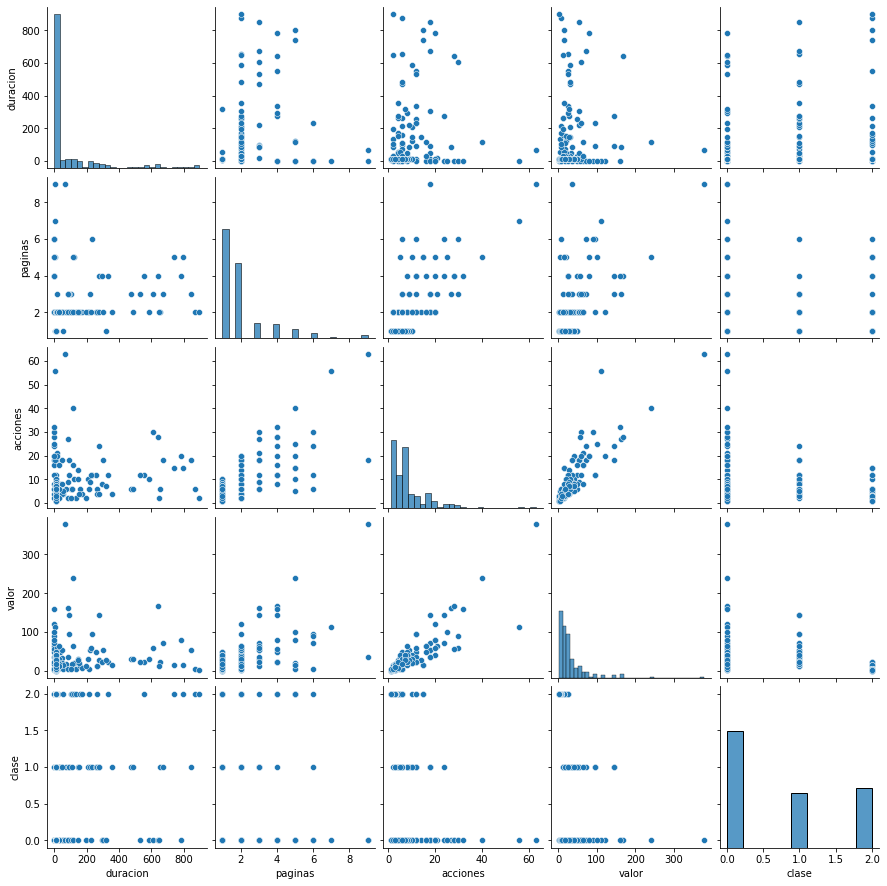

In [38]:
sns.pairplot(df)

<AxesSubplot:>

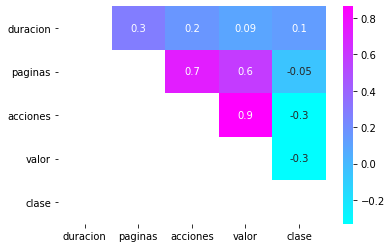

In [40]:
mask = np.tril(df.corr())
sns.heatmap(df.corr(), fmt='.1g', annot=True, cmap= 'cool', mask=mask)

# Multiple

In [73]:
X_multiple = df.iloc[:, 1:4]
X_multiple

,paginas,acciones,valor
0,2,4,8
1,2,6,6
2,2,4,4
3,3,6,12
4,2,6,12
...,...,...,...
165,1,7,42
166,1,2,6
167,1,3,9
168,1,7,28


In [72]:
y_multiple = df.duracion
y_multiple

0        7.0
1       21.0
2       57.0
3      101.0
4      109.0
       ...  
165     13.0
166     12.0
167     13.0
168     13.0
169     12.0
Name: duracion, Length: 170, dtype: float64

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.2)

In [75]:
lr_multiple = linear_model.LinearRegression()

In [76]:
lr_multiple.fit(X_train, y_train)

LinearRegression()

In [77]:
Y_pred_multiple = lr_multiple.predict(X_test)

In [78]:
print(lr_multiple.coef_)

[27.70585463  1.02766034 -0.38867758]


In [79]:
print(lr_multiple.intercept_)

58.26729751983729


### SCORE, COEF

In [81]:
print("Score: ", lr_multiple.score(X_multiple, y_multiple))
print("Coef: ", lr_multiple.coef_)

Score:  0.0754942788670967
Coef:  [27.70585463  1.02766034 -0.38867758]


# Paginas

In [59]:
X = np.array(df["paginas"])
y = np.array(df["duracion"])
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
paginas = linear_model.LinearRegression()
paginas.fit(X_train, y_train)
print("Paginas vs duracion score: ", paginas.score(X, y))
predictions = paginas.predict(X_test)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Paginas vs duracion score:  0.07403426003297531
RMSE: 207.52440095385927


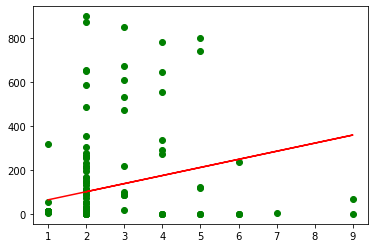

In [58]:
plt.scatter(X, y, color='g')
plt.plot(X, paginas.predict(X), color='red')

# Acciones

In [60]:
X = np.array(df["acciones"])
y = np.array(df["duracion"])
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
acciones = linear_model.LinearRegression()
acciones.fit(X_train, y_train)
print("Acciones vs duracion score: ", acciones.score(X, y))
predictions = acciones.predict(X_test)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Acciones vs duracion score:  0.021435372000119468
RMSE: 254.4439353980608


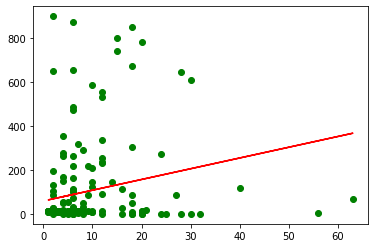

In [61]:
plt.scatter(X, y, color='g')
plt.plot(X, acciones.predict(X), color='red')

# Valor

In [62]:
X = np.array(df["valor"])
y = np.array(df["duracion"])
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
valor = linear_model.LinearRegression()
valor.fit(X_train, y_train)
print("Valor vs duracion score: ", valor.score(X, y))
predictions = valor.predict(X_test)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Valor vs duracion score:  0.007251597722650827
RMSE: 199.9613551519719


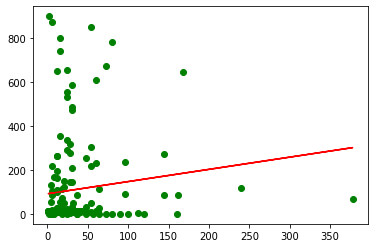

In [63]:
plt.scatter(X, y, color='g')
plt.plot(X, valor.predict(X), color='red')